In [1]:
# Loading Some Required Libraries:

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


# Objectives - Build Time Series model using fbprophet and predict
                            Dataset - covid 19 case   
### install following package: 


In [2]:
#dir(Prophet)

In [3]:
import fbprophet
from fbprophet import Prophet

In [4]:
# Loading Data with the helpl of pandas Dataframe:

df = pd.read_csv("/Users/admin/Project and Programming/Udemy:GL/Udemy/Time Seriies Analysis/Covid time series/Downloaded files/covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### Q.1 Perform Data Pre-Processing on data...

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


*Date columns data type is 'object' so need to convert 'timestamp'

In [6]:
df["Date"]=pd.to_datetime(df["Date"])

In [7]:
df.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
Active                     int64
WHO Region                object
dtype: object

In [8]:
# Checking Missing Or Null values
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [9]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


### *After Observeing data, I found in data's column was repeative ie many conutry data in same date so we need 'Groupby method' to get infomation of specfic days for all county or each country.

In [10]:
df["Date"].nunique()

188

In [11]:
total = df.groupby(df["Date"])["Confirmed","Deaths","Recovered","Active"].sum().reset_index()

In [12]:
total.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


## Task - 1 : Apply Prophet Model on Data


Prepare expected column name

Before fitting model, we have basically convert the name of the column, because by default, this is this is the property of 'prophet'


we give independent variable as name of 'ds' and whatever you have to predict, that is exactly in the form of 'y'.

df_columns=['ds','y']
 

In [13]:
df_prophet=total.rename(columns={"Date":"ds","Confirmed":"y"})

In [14]:
df_prophet.head()

,ds,y,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010


In [15]:
# Initialize prophet model:

m=Prophet()

In [16]:
model = m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Task - 2 : Create Future Data for Prediction Purpose...

In [17]:
model.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

D = Daily


In [18]:
# Creating future data for prediction purpose

"""It will create new DataFrame and it will also append 
df_prophet"""

future_global = model.make_future_dataframe(periods=30,freq='D')

"D = Dailywise"

'D = Dailywise'

In [19]:
future_global.head()

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26


In [20]:
'''there are 30 more entries in data due to "make_future_dataframe" and 
setting periods = 30 '''

print("df_prophet_shape: ",df_prophet.shape)
future_global.shape

df_prophet_shape:  (188, 5)


(218, 1)

In [21]:
df_prophet["ds"].tail()

183   2020-07-23
184   2020-07-24
185   2020-07-25
186   2020-07-26
187   2020-07-27
Name: ds, dtype: datetime64[ns]

In [22]:
future_global["ds"].tail()

213   2020-08-22
214   2020-08-23
215   2020-08-24
216   2020-08-25
217   2020-08-26
Name: ds, dtype: datetime64[ns]

## Visualising  Prediction

In [23]:
prediction=model.predict(future_global)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-5.689939e+03,-1.183333e+05,8.897423e+04,-5.689939e+03,-5.689939e+03,-11006.396274,-11006.396274,-11006.396274,-11006.396274,-11006.396274,-11006.396274,0.0,0.0,0.0,-1.669634e+04
1,2020-01-23,-3.228801e+03,-1.095466e+05,1.007272e+05,-3.228801e+03,-3.228801e+03,-1078.792675,-1078.792675,-1078.792675,-1078.792675,-1078.792675,-1078.792675,0.0,0.0,0.0,-4.307594e+03
2,2020-01-24,-7.676632e+02,-8.910667e+04,1.124779e+05,-7.676632e+02,-7.676632e+02,10108.672513,10108.672513,10108.672513,10108.672513,10108.672513,10108.672513,0.0,0.0,0.0,9.341009e+03
3,2020-01-25,1.693475e+03,-9.244108e+04,1.256811e+05,1.693475e+03,1.693475e+03,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,0.0,0.0,0.0,1.543129e+04
4,2020-01-26,4.154613e+03,-9.304068e+04,1.204504e+05,4.154613e+03,4.154613e+03,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,0.0,0.0,0.0,1.139939e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,2020-08-22,2.144317e+07,2.106632e+07,2.183509e+07,2.107366e+07,2.182033e+07,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,13737.819507,0.0,0.0,0.0,2.145691e+07
214,2020-08-23,2.164732e+07,2.123465e+07,2.206840e+07,2.125185e+07,2.204256e+07,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,7244.779377,0.0,0.0,0.0,2.165457e+07
215,2020-08-24,2.185148e+07,2.140167e+07,2.229352e+07,2.143209e+07,2.227823e+07,-2183.081986,-2183.081986,-2183.081986,-2183.081986,-2183.081986,-2183.081986,0.0,0.0,0.0,2.184930e+07
216,2020-08-25,2.205563e+07,2.160027e+07,2.248818e+07,2.161138e+07,2.250077e+07,-16823.000462,-16823.000462,-16823.000462,-16823.000462,-16823.000462,-16823.000462,0.0,0.0,0.0,2.203881e+07


In [24]:
prediction[["ds","yhat","yhat_lower","yhat_upper"]].tail()
# these are prediction

,ds,yhat,yhat_lower,yhat_upper
213,2020-08-22,2.145691e+07,2.106632e+07,2.183509e+07
214,2020-08-23,2.165457e+07,2.123465e+07,2.206840e+07
215,2020-08-24,2.184930e+07,2.140167e+07,2.229352e+07
216,2020-08-25,2.203881e+07,2.160027e+07,2.248818e+07
217,2020-08-26,2.224878e+07,2.176924e+07,2.273016e+07


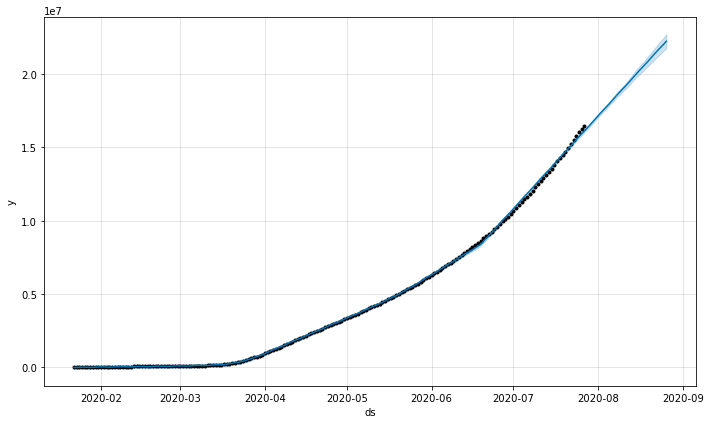

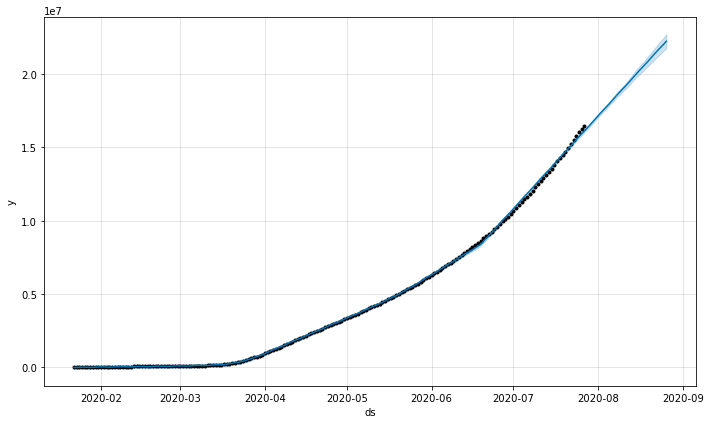

In [25]:
model.plot(prediction)
# light blue color >> predicted

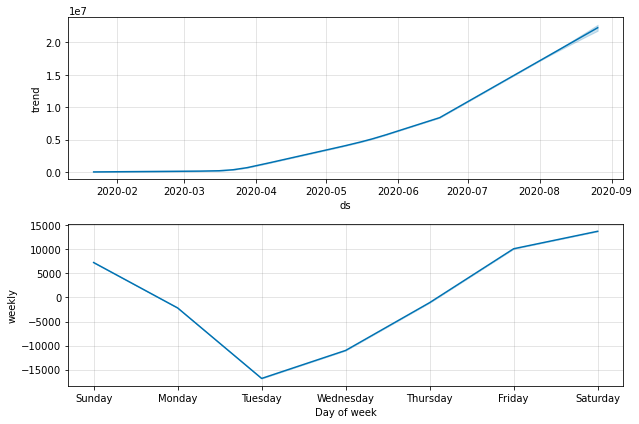

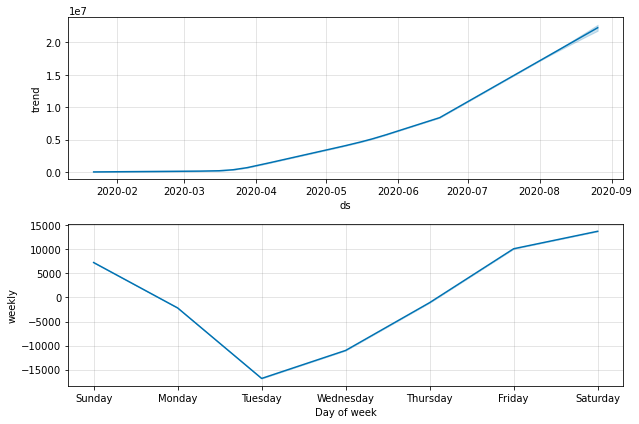

In [26]:
# let's visualizing each and every components of prediction...

model.plot_components(prediction)

### *After observing plot, we discover after 'tuesday' ,Trend or Rate of confirmed case increase....


### Q. What are the point on plot when lines or trends change dramatically and how can i plot  these change

In [27]:
# To change trend point
from fbprophet.plot import add_changepoints_to_plot

[[<matplotlib.lines.Line2D at 0x129e10190>],

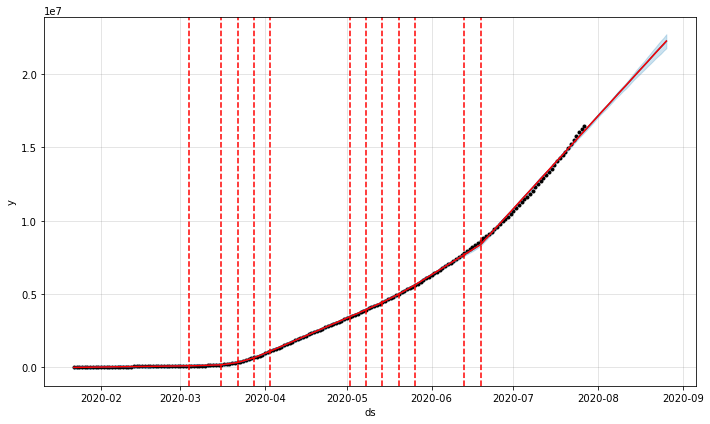

In [28]:
fig = model.plot(prediction)
add_changepoints_to_plot(fig.gca(),model,prediction)

## Cross validating of Time Series Data

In [29]:
from fbprophet.diagnostics import cross_validation

Horizon is nothing but for how many days we have to cross validate that mean 30 days. in period i am going to put always half of horizon and in initial we put always 3 times of horizon... 

In [30]:
df_cv=cross_validation(model,horizon="30 days",period="15 days", initial="90 days")

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-04-28 00:00:00 and 2020-06-27 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

In [31]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-04-29,3.201064e+06,3.195662e+06,3.206028e+06,3185195,2020-04-28
1,2020-04-30,3.285432e+06,3.279252e+06,3.291799e+06,3268876,2020-04-28
2,2020-05-01,3.369640e+06,3.361580e+06,3.377170e+06,3355922,2020-04-28
3,2020-05-02,3.450902e+06,3.439788e+06,3.462027e+06,3437608,2020-04-28
4,2020-05-03,3.530365e+06,3.514624e+06,3.546122e+06,3515244,2020-04-28


In [32]:
df_cv.shape

(150, 6)

## Task - Obtain performance Metrics for my model ...
               
     Let's COMPUTE -
              1. What is mean absolute error?
              2. What is mean absolute percentage error?
              3. What is mean squared error?
              4. What is root mean squard error?
              5. What is coverage of  yhat lower and yhat lower?
              

In [33]:
from fbprophet.diagnostics import performance_metrics

In [34]:
# Performance_metrics
df_performance=performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days,2.730259e+10,165234.962846,129387.188221,0.016893,0.017659,0.000000
1,4 days,3.780978e+10,194447.371596,151585.025321,0.019356,0.022478,0.000000
2,5 days,5.183286e+10,227668.307342,175424.594972,0.021807,0.025770,0.066667
3,6 days,6.954045e+10,263705.233164,202418.856704,0.024586,0.026763,0.133333
4,7 days,9.033300e+10,300554.486633,232779.260194,0.027869,0.031321,0.200000


In [35]:
from fbprophet.plot import plot_cross_validation_metric

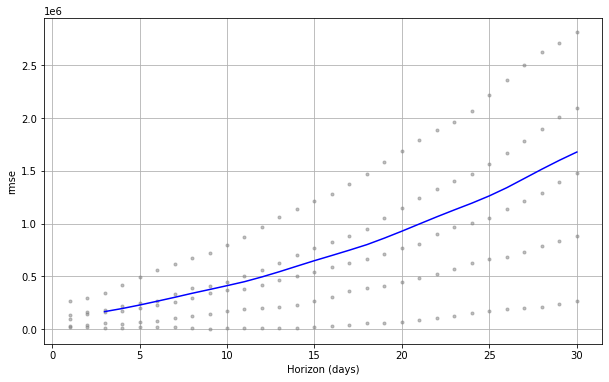

In [36]:
df_performance_plot=plot_cross_validation_metric(df_cv,metric="rmse")

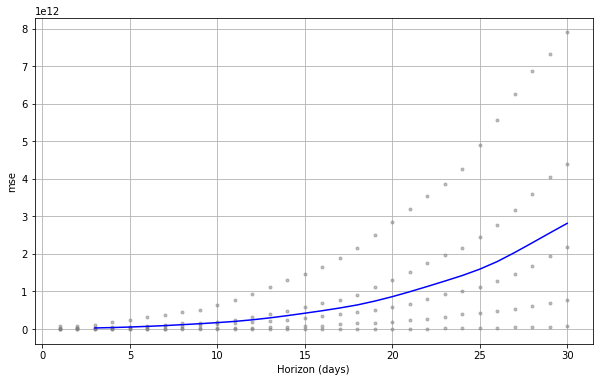

In [37]:
df_performance_plot=plot_cross_validation_metric(df_cv,metric="mse")

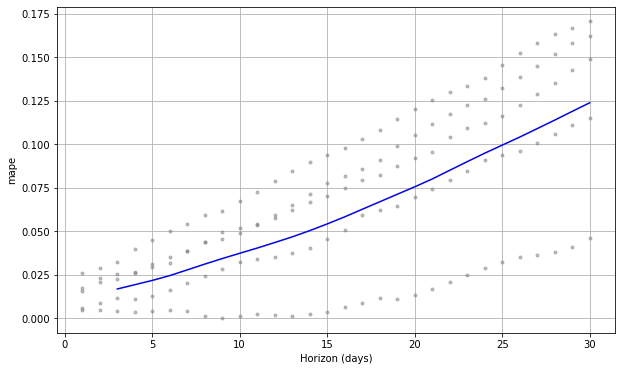

In [38]:
df_performance_plot=plot_cross_validation_metric(df_cv,metric="mape")